In [9]:
# %matplotlib Qt
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modules import LLS

In [11]:
data = pd.read_csv('data/HousePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [12]:
data.corr()

C:\Users\TitechCo\AppData\Local\Temp\ipykernel_4364\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000


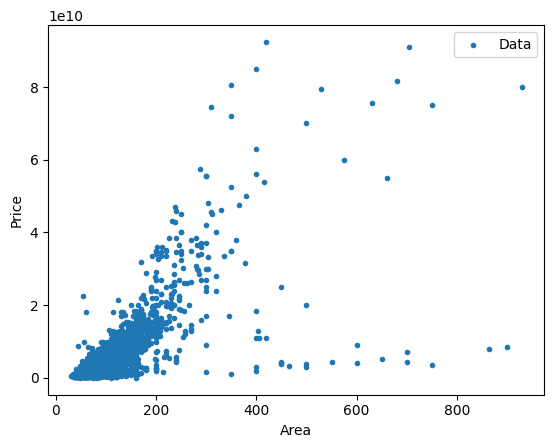

In [15]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(['Data'])
plt.show()